#### Logistic Map Lyapunov Exponent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def LogisticFn(mu, x):
    return mu * x * (1 - x)

In [3]:
def LogisticFnDeriv(mu, x):
    return mu * (1 - 2*x)

Generate bifurcation diagram data:

In [4]:
%%time
#-----
dis_bif = 5000
N_bif = 100
#-----
mu_List_bif = np.linspace(2.8, 4, 1001)
#-----
mu_data = []
x_data = []
for mu in mu_List_bif:
    x_List = [np.random.random()]
    for ii in range(1, dis_bif+N_bif):
        xtemp = LogisticFn(mu, x_List[ii-1])
        x_List.append(xtemp)
        
    for jj in range(N_bif):
        mu_data.append(mu)
        x_data.append(x_List[dis_bif+jj])

CPU times: user 4.43 s, sys: 28.1 ms, total: 4.46 s
Wall time: 4.49 s


Calculate Lyapunov exponent:

In [5]:
N = 2000 #Number of points I want in my Lyap exp sum.

In [6]:
mu_List = np.linspace(0.0, 4.0, 1001)

In [7]:
%%time
LE_List = []
for mu in mu_List:
    #-----
    # Run the trajectory to get rid of transients:
    x = np.random.random() #Logistic map IC.
    #-----
    LE = 0.0 #Initialize Lyapunov exponent.
    for ii in range(N):
        x = LogisticFn(mu, x)
        LE += np.log(np.abs(LogisticFnDeriv(mu, x)))
    LE_List.append(LE/N)

/Users/mc2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


CPU times: user 9.49 s, sys: 34.4 ms, total: 9.53 s
Wall time: 9.57 s


Note that LE for mu=4 is ln(2):

In [8]:
LE_List[-1], np.log(2)

(0.6926312249255873, 0.6931471805599453)

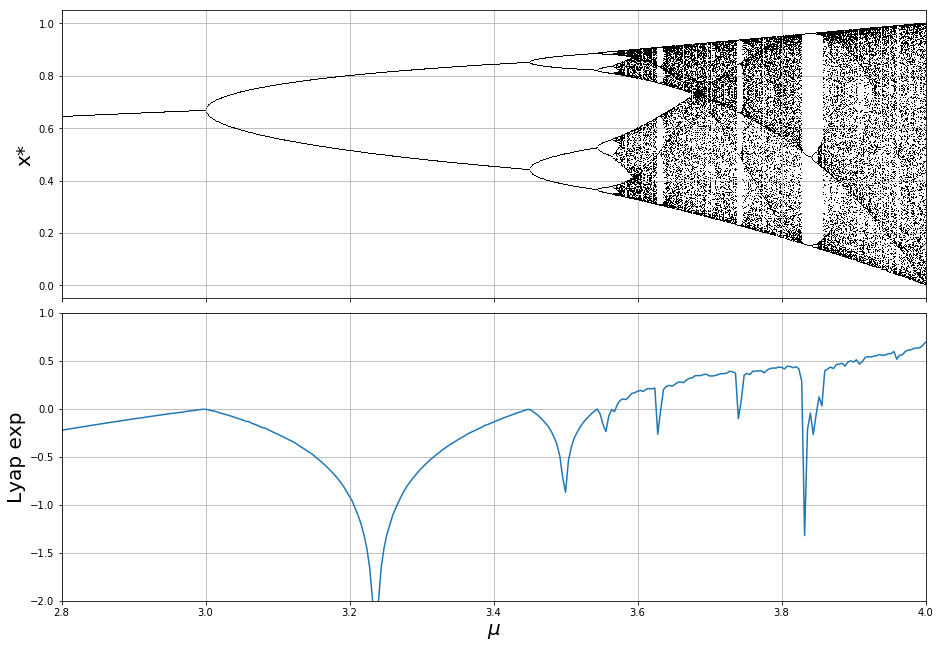

In [9]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 2, 1])
ax2 = fig.add_axes([0, -1.05, 2, 1])
#-----
ax1.plot(mu_data, x_data, "k,")
ax2.plot(mu_List, LE_List)
#-----
for ax in [ax1, ax2]:
    ax.set_xlim([2.8, 4])
    ax.grid(True)
ax2.set_ylim([-2, 1])
#-----
ax1.set_xticklabels([])
#-----
ax1.set_ylabel("x*", fontsize=20)
ax2.set_xlabel("$\mu$", fontsize=20)
ax2.set_ylabel("Lyap exp", fontsize=20)
#-----
plt.show()